In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# Kmean

5


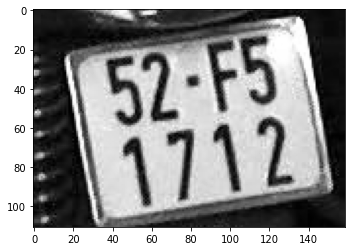

In [2]:
import glob
image = [cv2.imread(file) for file in glob.glob('data/input/*.jpg')]

#image = np.array(image)
image = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in image]
print(len(image))
plt.imshow(image[0], cmap='gray')
plt.show()

In [3]:
image_reshape = [img.reshape((-1, 1)) for img in image]
# print(len(image_reshape))

kmeans = [KMeans(n_clusters=2, init='random').fit(img) for img in image_reshape]
center = [i.cluster_centers_ for i in kmeans]
label = [i.labels_ for i in kmeans]
# print(len(kmeans))

segmented_image = [center[i][label[i]] for i in range(len(center))]
# print(len(segmented_image))

segmented_image_shape_back = [np.reshape(segmented_image[i], image[i].shape) for i in range(len(center))]


# segmented_image = center[label]
# segmented_image = np.reshape(segmented_image, img.shape)

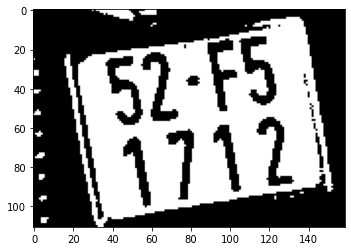

In [4]:
plt.imshow(segmented_image_shape_back[0], cmap='gray')
plt.show()

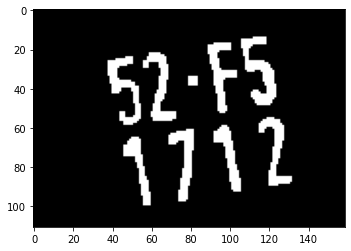

In [6]:
plt.imshow(ground_truth[0], cmap='gray')
plt.show()

In [5]:
ground_truth = [cv2.imread(file) for file in glob.glob('data/label/*.png')]
ground_truth = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in ground_truth]

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
for i in range(5):
    y_true = ground_truth[i].reshape(-1, 1)
    y_pred = segmented_image_shape_back[i].reshape(-1, 1)
    #print(classification_report(y_true, y_pred))
    thres =( y_pred.max() + y_pred.min() ) / 2
    y_pred[y_pred < thres] = 1
    y_pred[y_pred >= thres] = 0
    print("Classification report of image number ", i, " is: \n")
    print(classification_report(y_true, y_pred))
    print("Confusion matrix image number ", i, " is: \n")
    print(confusion_matrix(y_true, y_pred), "\n")
    
    print("-------------=============================-------------\n\n")
    
    
    



Classification report of image number  0  is: 

              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68     15869
         1.0       0.00      0.00      0.00         0
       255.0       0.00      0.00      0.00      1780

    accuracy                           0.47     17649
   macro avg       0.33      0.17      0.23     17649
weighted avg       0.89      0.47      0.62     17649

Confusion matrix image number  0  is: 

[[8319 7550    0]
 [   0    0    0]
 [ 120 1660    0]] 

-------------=============================-------------


Classification report of image number  1  is: 

              precision    recall  f1-score   support

         0.0       0.99      0.40      0.57     19479
         1.0       0.00      0.00      0.00         0
       255.0       0.00      0.00      0.00      1941

    accuracy                           0.36     21420
   macro avg       0.33      0.13      0.19     21420
weighted avg       0.90      0.36      0.5

KMeans(init='random', n_clusters=4)
[[ 83.16165414]
 [155.86609499]
 [ 21.61424731]
 [220.4348999 ]]
(17649,)


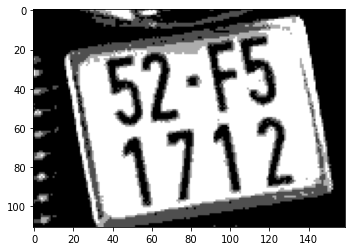

In [8]:
img = image[0]
X = img.reshape((-1, 1))
kmeans = KMeans(n_clusters=4, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image, cmap='gray')
plt.show()

# MeanShift

MeanShift(bandwidth=1, seeds=array([[ 25],
       [254]], dtype=uint8))
[[ 24.488     ]
 [253.64125561]]
(17649,)


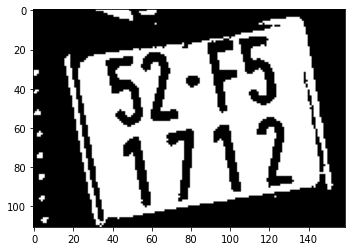

In [9]:
img = image[0]
X = img.reshape((-1, 1))

def init_seed(X, k):
    return X[np.random.choice(X.shape[
        0], k, replace=False)]

random_seeds = init_seed(X, 2)

ms = MeanShift(bandwidth=1, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image, cmap='gray')

plt.show()

# Sử dụng không gian đặc trưng 3D

In [10]:
import glob
image = [cv2.imread(file) for file in glob.glob('Anh bien so xe/*.jpg')]

#image = np.array(image)
image = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in image]

img = image[0]

X = img.reshape((-1, 1))
print(X.shape)

(19608, 1)


In [11]:
def get_3D_vector(img):
    X = None
    
    #### YOUR CODE HERE ####
    X = img.reshape((-1, 3))
    #### END YOUR CODE #####
    
    return X

In [12]:
X = get_3D_vector(img)
print(X.shape)

(6536, 3)


KMeans(init='random', n_clusters=4)


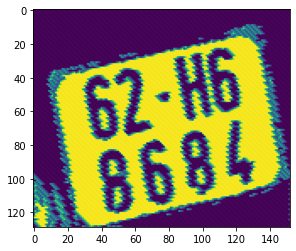

In [13]:
kmeans = KMeans(n_clusters=4, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()

### Mean Shift

MeanShift(bandwidth=10,
          seeds=array([[21, 43, 47],
       [58, 88, 91]], dtype=uint8))
[[25.24295302 25.20939597 25.5114094 ]
 [57.8        86.8        91.2       ]]
(6536,)


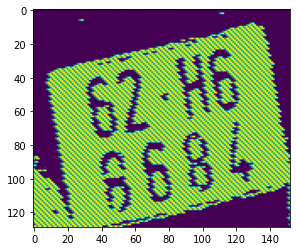

In [14]:
random_seeds = init_seed(X, 2)

ms = MeanShift(bandwidth=10, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()

### Không gian 5D

In [15]:
image = [cv2.imread(file) for file in glob.glob('data/input/*.jpg')]
img = image[0]
def get_5D_vector(img):
    X = None
    
    #### YOUR CODE HERE ####
    X_pos = np.zeros((img.shape[0], img.shape[1], 2))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            X_pos[i][j][0] = i
            X_pos[i][j][1] = j
    X = img.reshape((-1, 3))
    X_pos = X_pos.reshape((-1, 2))

    X = np.concatenate((X, X_pos), axis=1)
    #### END YOUR CODE #####
    
    return X

X = get_5D_vector(img)

### KMean

KMeans(init='random', n_clusters=2)


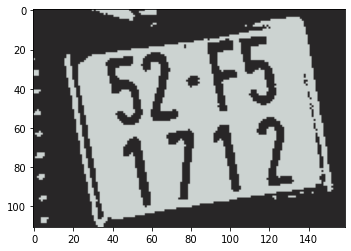

In [16]:
kmeans = KMeans(n_clusters=2, init='random').fit(X)
print(kmeans)
center = kmeans.cluster_centers_
label = kmeans.labels_


segmented_image = center[label]
segmented_image = segmented_image[:, :3]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()
#### END YOUR CODE #####

### Mean shift

MeanShift(bandwidth=10,
          seeds=array([[206., 213., 216.,  24., 100.],
       [147., 153., 152.,   5., 133.]]))
[[204.63157895 214.73684211 216.31578947  23.63157895 101.89473684]
 [144.         151.         150.           4.5        133.        ]]
(17649,)


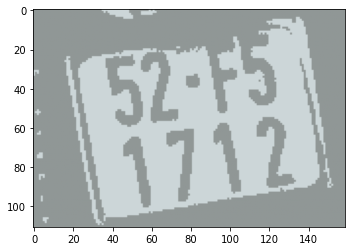

In [17]:
random_seeds = init_seed(X, 2)

ms = MeanShift(bandwidth=10, seeds=random_seeds)
print(ms)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

print(center)
print(label.shape)

segmented_image = center[label]
segmented_image = segmented_image[:, :3]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()
